# Assignment 1 
### Social Data and Analysis 2026 

## Assignment 1.1: Temporal Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data 
#recent_data = pd.read_csv('data/recent.csv')
#historical_data = pd.read_csv('data/historical.csv')
focus_data = pd.read_csv('data/focus.csv')

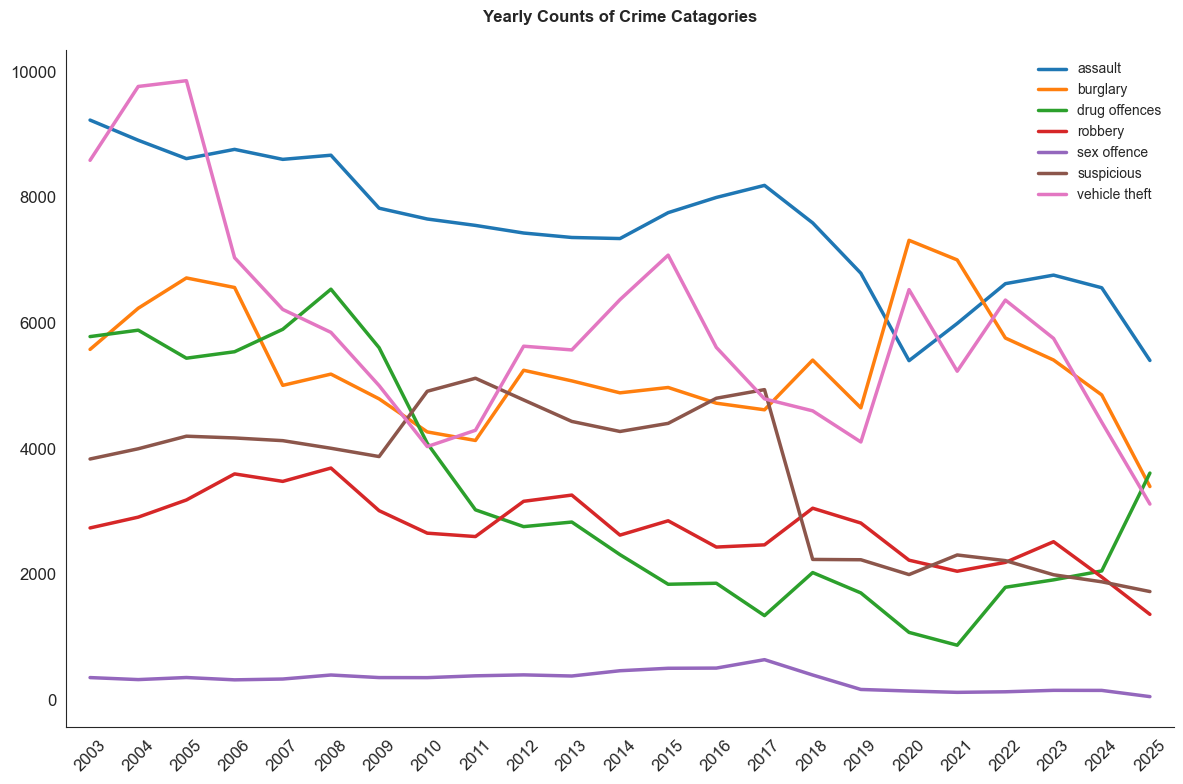

In [20]:
focus = ['assault', 'vehicle theft', 'drug offences', 'burglary', 'robbery', 'suspicious', 'sex offence']

focus_data['Date'] = pd.to_datetime(focus_data['Date'], format='%Y-%m-%d')
focus_data['year'] = focus_data['Date'].dt.year
focus_data['month'] = focus_data['Date'].dt.month

df_focus = focus_data[focus_data['Category'].isin(focus)]
yearly_counts = df_focus[df_focus['year'] <= 2025].groupby(['year', 'Category']).size().unstack(fill_value=0)

# Set seaborn style
sns.set_style("white")
sns.set_palette("tab10")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 8))
for crime in yearly_counts.columns:
    plt.plot(yearly_counts.index, yearly_counts[crime], label=crime, linewidth=2.5, markersize=8)

plt.title("Yearly Counts of Crime Catagories", fontsize=12, fontweight='bold', pad=20)

plt.xlim(2002.5, 2025.5)
plt.xticks(yearly_counts.index, rotation=45)
plt.legend(frameon=False, loc='best', fontsize=10)
sns.despine()
plt.tight_layout()

plt.show()


### Key trends in focus areas:

1) **Drop in number of assult during COVID:**
There is a noticeable drop in recorded assault offences around 2020. Around this time, COVID restrictions were enforced, limiting nightlife and public gatherings and reducing face-to-face interactions. This resulted in far fewer opportunities for interpersonal violence, which is clearly reflected in the data.

2) **Surge in burglaryes and vehicle theft during covid:**
During the pandemic, the data shows an opposite, but just as noticeable, trend — a surge in recorded vehicle thefts and burglaries. This trend can also be explained by the social impacts of COVID restrictions. Empty buildings, reduced street activity, and longer periods of parked vehicles created more opportunities for property crime. Additionally, COVID was a time of increased economic stress, which likely also contributed to this rise. 

3) **General drop in drug offences, then surge again around 21-22**
Drug offenses declined steadily for much of the timeline until around the pandemic period in 2021. This long-term decrease was driven in part by reduced enforcement and a shift toward diversion and treatment rather than arrest for low-level drug possession. By 2024, however, the number of recorded drug offenses rose to above pre-pandemic levels. This reversal reflects a change in policy and enforcement focus: in response to public pressure tied to highly visible drug markets, overdose deaths, and street disorder, San Francisco increased enforcement of drug-related offenses. Police began making more arrests, particularly for dealing and public drug use, as part of an effort to address open-air drug activity rather than relying primarily on treatment and diversion. In 2024, the mayor signed legislation allowing police to arrest drug users and transport them to a treatment facility, which emphasises the city’s change in course.

4) **General decline in robberies:**
Robbery shows a general long-term downward trend. The shift toward cashless payments, increased surveillance, and widespread smartphone tracking have reduced both the payoff and success rate of robberies. Even during periods of social disruption, robbery continues to decline.



